In [9]:
import cv2
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 


In [74]:

def _get_border(border, size):
    i = 1
    while size - border // i <= border // i:
        i *= 2
    return border // i

def _full_image_crop(image):
    height, width = image.shape[0:2]

    max_hw = max(height, width)
    center = [height // 2, width // 2]
    size   = [max_hw, max_hw]

    image, border, offset = crop_image(image, center, size)

    return image

def _resize_image(image, size):
    height, width = image.shape[0:2]
    new_height, new_width = size

    image = cv2.resize(image, (new_width, new_height))
    
    height_ratio = new_height / height
    width_ratio  = new_width  / width
    return image

def crop_image(image, center, size):
    cty, ctx            = center
    height, width       = size
    im_height, im_width = image.shape[0:2]
    cropped_image       = np.zeros((height, width, 3), dtype=image.dtype)

    x0, x1 = max(0, ctx - width // 2), min(ctx + width // 2, im_width)
    y0, y1 = max(0, cty - height // 2), min(cty + height // 2, im_height)

    left, right = ctx - x0, x1 - ctx
    top, bottom = cty - y0, y1 - cty
    
    cropped_cty, cropped_ctx = height // 2, width // 2
    y_slice = slice(cropped_cty - top, cropped_cty + bottom)
    x_slice = slice(cropped_ctx - left, cropped_ctx + right)
    cropped_image[y_slice, x_slice, :] = image[y0:y1, x0:x1, :]

    border = np.array([
       cropped_cty - top,
       cropped_cty + bottom,
       cropped_ctx - left,
       cropped_ctx + right
    ], dtype=np.float32)

    offset = np.array([
        cty - height // 2,
        ctx - width  // 2
    ])

    return cropped_image, border, offset

def random_crop(image, random_scales, view_size, border=64):
    view_height, view_width   = view_size
    image_height, image_width = image.shape[0:2]

    scale  = np.random.choice(random_scales)
    height = int(view_height * scale)
    width  = int(view_width  * scale)
    print(scale)
    
    cropped_image = np.zeros((height, width, 3), dtype=image.dtype)

    w_border = _get_border(border, image_width)
    h_border = _get_border(border, image_height)

    ctx = np.random.randint(low=w_border, high=image_width - w_border)
    cty = np.random.randint(low=h_border, high=image_height - h_border)

    x0, x1 = max(ctx - width // 2, 0),  min(ctx + width // 2, image_width)
    y0, y1 = max(cty - height // 2, 0), min(cty + height // 2, image_height)
    
    left_w, right_w = ctx - x0, x1 - ctx
    top_h, bottom_h = cty - y0, y1 - cty

#     print(right_w-left_w, top_h- bottom_h)
    # crop image
    cropped_ctx, cropped_cty = width // 2, height // 2
    x_slice = slice(cropped_ctx - left_w, cropped_ctx + right_w)
    y_slice = slice(cropped_cty - top_h, cropped_cty + bottom_h)
    print(y1-y0, x1-x0)
    cropped_image[y_slice, x_slice, :] = image[y0:y1, x0:x1, :]


    return cropped_image

(415, 500, 3)


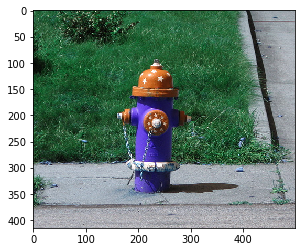

In [33]:
image_file = "/home/rragarwal4/matrixnet/data/coco/images/train2017/000000264940.jpg"
image = cv2.imread(image_file)
print(image.shape)
plt.imshow(image)

In [34]:
input_size = [640,640]
rand_scales = [1,1]
border = 128

(500, 500, 3)


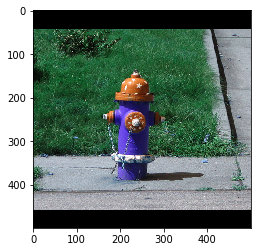

In [35]:
image = _full_image_crop(image)
print(image.shape)
plt.imshow(image)

(640, 640, 3)


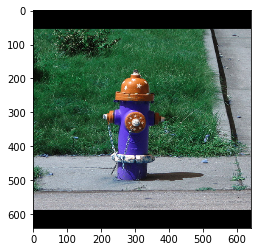

In [37]:
image = _resize_image(image, input_size)
print(image.shape)
plt.imshow(image)

(415, 500, 3)
1.4
415 500
(896, 896, 3)


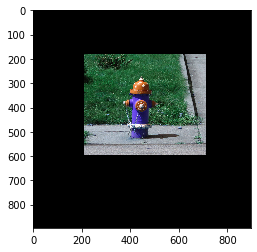

In [98]:
image_file = "/home/rragarwal4/matrixnet/data/coco/images/train2017/000000264940.jpg"
image = cv2.imread(image_file)
print(image.shape)
image = random_crop(image, rand_scales, input_size, border=border)
print(image.shape)
plt.imshow(image)


(640, 640, 3)


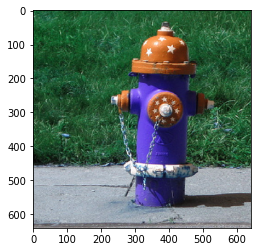

In [44]:
image = _resize_image(image, input_size)
print(image.shape)
plt.imshow(image)